In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift, ifftshift, ifft2
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
pi = np.pi

# Discrete time signal vs Digital signal vs Analog signal
- **Analog signal** -> $x(t_1, t_2)$, $t_1$ and $t_1$ are continious, $x(t1, t2)$ is continious
- **Discrete time signal** -> $x[n, m]$, $n$ and $m$ are discrete, $x[n, m]$ is continious
- **Digital signal** -> $x[n, m]$, $n$ and $m$ are discrete, $x[n, m]$ is discrete

For discrete 2d signal, <span style="color:red">$n = 0,~1,~2,~\cdots,~(N-1)$</span> and <span style="color:red">$m = 0,~1,~2,~\cdots,~(M-1)$</span> where $N = x.\mathrm{shape[0]}$ and $M = x.\mathrm{shape[1]}$

# Example of 2D periodic discrete time signal - sinusoids (sin, cos)

In [2]:
n_cycle_1 = 3
n_cycle_2 = 0

N = 100
M = 100

f1 = n_cycle_1/N
f2 = n_cycle_2/M

n, m = np.meshgrid(np.arange(N), np.arange(M))

In [3]:
#N = M = 10
#n = np.arange(N)
#m = np.arange(M)
#print(n)
#print(m)

#n_mat, m_mat = np.meshgrid(n, m)

In [4]:
#n_mat

In [5]:
#m_mat

In [6]:
x = np.cos(2*pi*f1*n + 2*pi*f2*m)

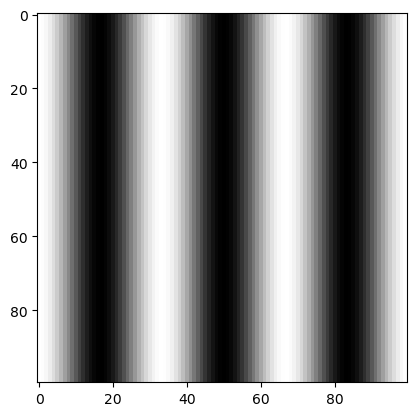

In [7]:
%matplotlib inline
plt.figure()
plt.imshow(x, cmap="gray")

In [8]:
%matplotlib inline

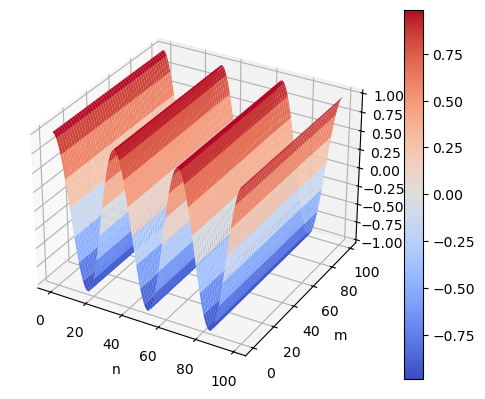

In [9]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(n, m, x, cmap=cm.coolwarm)
ax.set_xlabel("n")
ax.set_ylabel("m")
fig.colorbar(surf)
plt.show()

In [10]:
from numpy.fft import fft, fft2, fftshift, fftfreq
# Compute DFT
X = fft2(x)

# Center the magnitude response to (M/2, N/2) & normalize
X_centered = fftshift(X)

u = fftshift(fftfreq(N))
v = fftshift(fftfreq(M))

u, v = np.meshgrid(u, v)

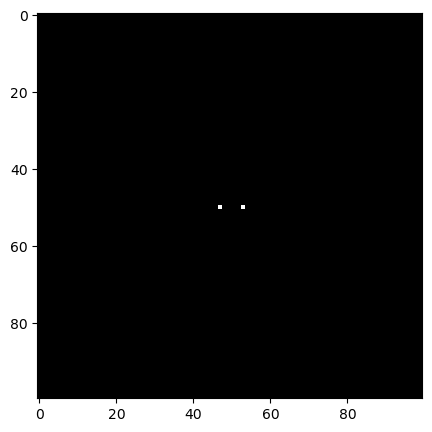

In [11]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.imshow(np.log(1+np.abs(X_centered)), cmap="gray")

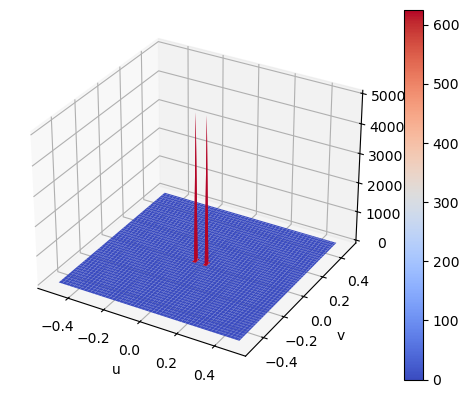

In [12]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(u, v, np.abs(X_centered), cmap=cm.coolwarm)
ax.set_xlabel("u")
ax.set_ylabel("v")
fig.colorbar(surf)
plt.show()

# Frequency along x and y

In [13]:
n_cycle_1 = 3
n_cycle_2 = 5

N = 100
M = 100

f1 = n_cycle_1/N
f2 = n_cycle_2/M

n, m = np.meshgrid(np.arange(N), np.arange(M))

x = np.cos(2*pi*f1*n + 2*pi*f2*m)

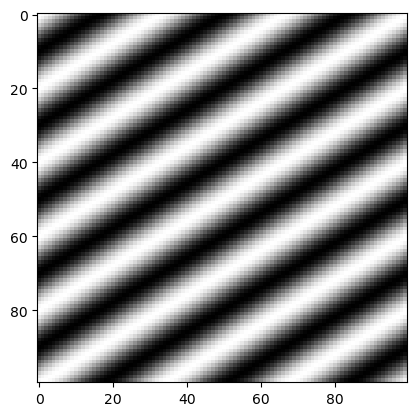

In [14]:
%matplotlib inline
plt.figure()
plt.imshow(x, cmap="gray")

In [15]:
def perform_fft2(x, N, M):
    X = fft2(x)
    X = fftshift(X)


    u = fftshift(fftfreq(N))
    v = fftshift(fftfreq(M))

    u, v = np.meshgrid(u, v)

    return X, u, v

In [16]:
X, u, v = perform_fft2(x, N, M)

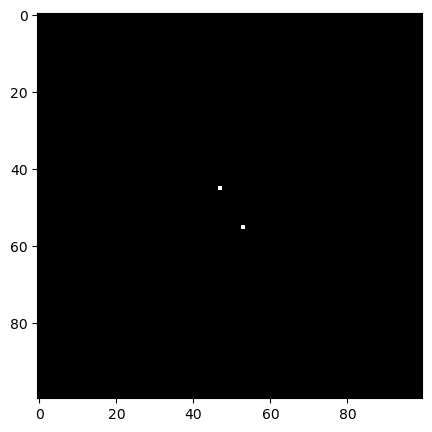

In [17]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.imshow(np.abs(X), cmap="gray")

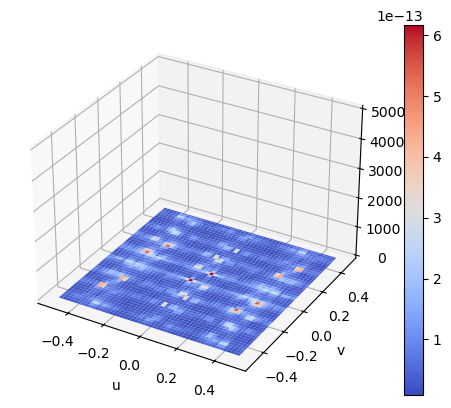

In [18]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(u, v, np.abs(X), cmap=cm.coolwarm)
ax.set_xlabel("u")
ax.set_ylabel("v")
fig.colorbar(surf)
plt.show()